In [248]:
import numpy as np
import pandas as pd
from pulp import *
import copy
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('dataset.csv')
data = data.sort_values(by = 'Unnamed: 0')
ids = data[['Unnamed: 0']]
data = data.drop('Unnamed: 0', axis = 'columns')
data = data.reset_index(drop = True)
data.index = data.index+1
data.index = 'a'+ data.index.astype('str')
data

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt
a1,3,840000.0,13.8,3.0,2.0,2.0,534.0,136.00,1965.0
a2,4,1100000.0,5.9,4.0,2.0,5.0,559.0,195.00,1920.0
a3,2,495000.0,13.9,2.0,1.0,1.0,76.0,79.00,1980.0
a4,3,1120000.0,7.8,3.0,2.0,1.0,293.0,180.00,2006.0
a5,4,2325000.0,9.2,4.0,3.0,2.0,638.0,314.00,1930.0
a6,3,822000.0,13.0,3.0,1.0,4.0,700.0,105.00,1950.0
a7,3,1560000.0,4.6,3.0,2.0,0.0,198.0,148.00,1910.0
a8,2,650000.0,10.5,2.0,1.0,3.0,620.0,85.00,1950.0
a9,3,1223500.0,7.9,3.0,2.0,2.0,721.0,136.00,1980.0
a10,2,790000.0,11.2,2.0,1.0,2.0,196.0,109.00,1970.0


In [301]:
ids

,Unnamed: 0
37,171
15,318
10,800
34,1984
31,2757
41,2874
24,3177
13,3249
35,3404
1,3833


In [3]:
data.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt
count,50.000000,5.000000e+01,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000
mean,2.940000,1.010540e+06,10.760000,2.920000,1.580000,1.72000,400.440000,146.037400,1966.520000
std,0.977502,4.836915e+05,7.117727,0.965528,0.641745,1.03095,305.460586,67.062725,33.749522
min,1.000000,3.610000e+05,2.100000,1.000000,1.000000,0.00000,0.000000,46.000000,1890.000000
25%,2.000000,6.507500e+05,7.325000,2.000000,1.000000,1.00000,170.000000,105.250000,1942.500000
50%,3.000000,8.785000e+05,9.350000,3.000000,1.500000,2.00000,318.500000,132.000000,1970.000000
75%,3.000000,1.255000e+06,13.975000,3.000000,2.000000,2.00000,599.250000,183.750000,1992.750000
max,6.000000,2.440000e+06,45.900000,6.000000,3.000000,5.00000,1452.000000,314.000000,2013.000000


## **2.1. UTA algorithm - finding minimal subset of inconsistent constraints** ##

In [227]:
# preference_list - list of pairs (better, worse)
preference_list = [("a4", "a9"), ("a9", "a13"), ("a13", "a4"), ("a4", "a1"), ("a45", "a32"), 
("a27", "a18"), ("a25", "a28"), ("a45", "a50"), ("a43", "a37"), ("a39", "a38"), 
("a31", "a33"), ("a30", "a42"), ("a40", "a35"), ("a27", "a26"), ("a3", "a11"), 
("a6", "a7"), ("a21", "a2"), ("a15", "a12"), ("a20", "a29"), ("a41", "a24"), 
("a23", "a34"), ("a5", "a18"), ("a8", "a14"), ("a10", "a19"), ("a22", "a16"),
("a49", "a44"), ("a36", "a48"), ("a47", "a46"),("a1", "a13"), ("a21", "a12"),
("a27", "a17"), ("a43", "a28"), ("a50", "a49"), ("a25", "a16"), ("a4", "a16"),
("a8", "a11"), ("a20", "a13"), ("a26", "a5"), ("a32", "a33"), ("a40", "a33"),
("a8", "a6"), ("a1", "a11"), ("a11", "a13"), ("a45", "a41"), ("a21", "a23"),
("a18", "a7"), ("a24", "a19"), ("a27", "a21"), ("a39", "a30"), ("a49", "a23")]

# Inconsistencies: cycle a4, a9, a13

In [228]:
# criteria_types - list of pairs in form (gain or cost type, is discrete?)
criteria_types = [('gain', True), ('cost', False), 
('cost', False), ('gain', True), ('gain', True), 
('gain', True), ('gain', False), ('gain', False), 
('gain', False)]

In [229]:
def compute_breakpoints(values, num_breakpoints):
    """Compute equally spaced breakpoints over a criterion’s value range."""
    min_val, max_val = np.min(values), np.max(values)
    return np.linspace(min_val, max_val, num_breakpoints)

In [253]:
def build_uta_model_with_piecewise(preference_list, df, criteria_types, num_breakpoints=6):
    model = LpProblem('UTA_Model_Piecewise', LpMinimize)
    eps = 0.01

    alternatives = df.index.tolist()
    criteria = df.columns.tolist()
    n_criteria = len(criteria)

    # 1a Define weights
    weights = {
        crit: LpVariable(f'w_{crit}', lowBound=1 / (5 * n_criteria), upBound=0.5, cat='Continuous')
        for crit in criteria
    }

    # 1b Normalization constraint
    model += lpSum([weights[i] for i in df.columns]) == 1

    # 2. Define breakpoints and lambda values
    breakpoints = {crit: compute_breakpoints(df[crit], num_breakpoints) for crit in criteria}
    lambdas = {
        (crit, k): LpVariable(f'lambda_{crit}_{k}', lowBound=0, upBound=1, cat='Continuous')
        for crit in criteria for k in range(num_breakpoints)
    }

    for i in range(len(criteria_types)):
        if criteria_types[i][0] == 'cost':
            model += lambdas[(criteria[i], 0)] == 1
            model += lambdas[(criteria[i], num_breakpoints - 1)] == 0
            for k in range(num_breakpoints - 1):
                model += lambdas[(criteria[i], k)] >= lambdas[(criteria[i], k + 1)] + 0.1
        else:
            model += lambdas[(criteria[i], 0)] == 0
            model += lambdas[(criteria[i], num_breakpoints - 1)] == 1
            for k in range(num_breakpoints - 1):
                model += lambdas[(criteria[i], k)] + 0.1 <= lambdas[(criteria[i], k + 1)]

    # 3. Interpolation weights
    interpolation_weights = {}
    for alt in alternatives:
        for crit in criteria:
            val = df.loc[alt, crit]
            bp = breakpoints[crit]
            for k in range(num_breakpoints - 1):
                if bp[k] <= val <= bp[k + 1]:
                    alpha = (val - bp[k]) / (bp[k + 1] - bp[k]) if bp[k + 1] != bp[k] else 0
                    interpolation_weights[(alt, crit)] = (k, 1 - alpha, alpha)
                    break

    # 4. Define U(alt) as sum of weighted marginal utilities
    U = {
        alt: LpVariable(f'U_{alt}', lowBound=0, upBound=1, cat='Continuous')
        for alt in alternatives
    }

    for alt in alternatives:
        weighted_sum_expr = []
        for crit in criteria:
            k, beta1, beta2 = interpolation_weights[(alt, crit)]
            marginal = beta1 * lambdas[(crit, k)] + beta2 * lambdas[(crit, k + 1)]

            # New variable for marginal utility
            u_crit = LpVariable(f'u_{alt}_{crit}', lowBound=0, upBound=1)
            model += u_crit == marginal

            # New variable for weighted utility
            wu = LpVariable(f'wu_{alt}_{crit}', lowBound=0, upBound=1)

            # Linearization of wu = w * u
            model += wu <= weights[crit]
            model += wu <= u_crit
            model += wu >= weights[crit] + u_crit - 1
            # model += wu >= 0

            weighted_sum_expr.append(wu)

        model += U[alt] == lpSum(weighted_sum_expr)

    # 5. Preference constraints with slack variables
    binary_vars = {
        (a1, a2): LpVariable(f'z_{a1}_{a2}', cat='Binary')
        for (a1, a2) in preference_list
    }
    model += lpSum(binary_vars.values())  # objective

    for (a1, a2) in preference_list:
        model += U[a1] >= U[a2] + eps - binary_vars[(a1, a2)]
    return model

In [254]:
model = build_uta_model_with_piecewise(preference_list, data, criteria_types)
status = model.solve(solver = GLPK())

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --cpxlp /var/folders/8m/nx_b_wh17dg77b9kb95gxng80000gp/T/249d7831536a469fb283d57829f2d447-pulp.lp
 -o /var/folders/8m/nx_b_wh17dg77b9kb95gxng80000gp/T/249d7831536a469fb283d57829f2d447-pulp.sol
Reading problem data from '/var/folders/8m/nx_b_wh17dg77b9kb95gxng80000gp/T/249d7831536a469fb283d57829f2d447-pulp.lp'...
1964 rows, 1063 columns, 5073 non-zeros
50 integer variables, all of which are binary
3378 lines were read
GLPK Integer Optimizer 5.0
1964 rows, 1063 columns, 5073 non-zeros
50 integer variables, all of which are binary
Preprocessing...
1715 rows, 944 columns, 4390 non-zeros
50 integer variables, all of which are binary
Scaling...
 A: min|aij| =  4.566e-03  max|aij| =  1.000e+00  ratio =  2.190e+02
GM: min|aij| =  1.198e-01  max|aij| =  8.344e+00  ratio =  6.962e+01
EQ: min|aij| =  1.436e-02  max|aij| =  1.000e+00  ratio =  6.962e+01
2N: min|aij| =  7.937e-03  max|aij| =  1.727e+00  ratio =  2.176e+02
C

In [255]:
print("status:", model.status, LpStatus[model.status])
print("objective:", model.objective.value())

status: 1 Optimal
objective: 1


In [257]:
for var in model.variables():
    if 'z_' in var.name and var.value() > 0:
        print(var.name, var.value(), "is inconsistent")

z_a13_a4 1 is inconsistent


### **Discussion of the results** ###

Only one constraint is inconsistent - this comes from a cycle of preferences: a4 > a9, a9 > a13, a13 > a4. From obvious reasons all three cannot hold thus one of these (last added) must be deleted (as expected)

## **2.2 UTA - marginal utility function + plots** ##

### **Deleting inconsistent constraint** ##

In [267]:
consistent_preference_list = list(set(preference_list).difference({('a13', 'a4')}))

### **2.2.1 - Building a model** ###

In [268]:
def build_uta_model_2_2(preference_list, df, criteria_types, num_breakpoints = 6):
    model = LpProblem('UTA_Model_max_distance', LpMaximize)
    eps = 0.001

    alternatives = df.index.tolist()
    criteria = df.columns.tolist()
    n_criteria = len(criteria)

    # 1a Define weights
    weights = {
        crit: LpVariable(f'w_{crit}', lowBound=1 / (5 * n_criteria), upBound=0.5, cat='Continuous')
        for crit in criteria
    }

    # 1b Normalization constraint
    model += lpSum([weights[i] for i in df.columns]) == 1

    # 2. Define breakpoints and lambda values
    breakpoints = {crit: compute_breakpoints(df[crit], num_breakpoints) for crit in criteria}
    lambdas = {
        (crit, k): LpVariable(f'lambda_{crit}_{k}', lowBound=0, upBound=1, cat='Continuous')
        for crit in criteria for k in range(num_breakpoints)
    }

    for i in range(len(criteria_types)):
        if criteria_types[i][0] == 'cost':
            model += lambdas[(criteria[i], 0)] == 1
            model += lambdas[(criteria[i], num_breakpoints - 1)] == 0
            for k in range(num_breakpoints - 1):
                model += lambdas[(criteria[i], k)] >= lambdas[(criteria[i], k + 1)] + 0.1
        else:
            model += lambdas[(criteria[i], 0)] == 0
            model += lambdas[(criteria[i], num_breakpoints - 1)] == 1
            for k in range(num_breakpoints - 1):
                model += lambdas[(criteria[i], k)] + 0.1 <= lambdas[(criteria[i], k + 1)]

    # 3. Interpolation weights
    interpolation_weights = {}
    for alt in alternatives:
        for crit in criteria:
            val = df.loc[alt, crit]
            bp = breakpoints[crit]
            for k in range(num_breakpoints - 1):
                if bp[k] <= val <= bp[k + 1]:
                    alpha = (val - bp[k]) / (bp[k + 1] - bp[k]) if bp[k + 1] != bp[k] else 0
                    interpolation_weights[(alt, crit)] = (k, 1 - alpha, alpha)
                    break

    # 4. Define U(alt) as sum of weighted marginal utilities
    U = {
        alt: LpVariable(f'U_{alt}', lowBound=0, upBound=1, cat='Continuous')
        for alt in alternatives
    }

    for alt in alternatives:
        weighted_sum_expr = []
        for crit in criteria:
            k, beta1, beta2 = interpolation_weights[(alt, crit)]
            marginal = beta1 * lambdas[(crit, k)] + beta2 * lambdas[(crit, k + 1)]

            # New variable for marginal utility
            u_crit = LpVariable(f'u_{alt}_{crit}', lowBound=0, upBound=1)
            model += u_crit == marginal

            # New variable for weighted utility
            wu = LpVariable(f'wu_{alt}_{crit}', lowBound=0, upBound=1)

            # Linearization of wu = w * u
            model += wu <= weights[crit]
            model += wu <= u_crit
            model += wu >= weights[crit] + u_crit - 1
            # model += wu >= 0

            weighted_sum_expr.append(wu)

        model += U[alt] == lpSum(weighted_sum_expr)

    # 5. Objective function:
    obj = []
    for (a1, a2) in preference_list:
        obj.append(U[a1] - U[a2])
    model += lpSum(obj) # objective

    # 6. Preference relations
    for (a1, a2) in preference_list:
        model += U[a1] >= U[a2] + eps

    return model

In [269]:
model2 = build_uta_model_2_2(consistent_preference_list, data, criteria_types)
status = model2.solve(solver = GLPK())

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --cpxlp /var/folders/8m/nx_b_wh17dg77b9kb95gxng80000gp/T/9692e3e7053c4634a69be2c1be648375-pulp.lp
 -o /var/folders/8m/nx_b_wh17dg77b9kb95gxng80000gp/T/9692e3e7053c4634a69be2c1be648375-pulp.sol
Reading problem data from '/var/folders/8m/nx_b_wh17dg77b9kb95gxng80000gp/T/9692e3e7053c4634a69be2c1be648375-pulp.lp'...
1963 rows, 1013 columns, 5021 non-zeros
3324 lines were read
GLPK Simplex Optimizer 5.0
1963 rows, 1013 columns, 5021 non-zeros
Preprocessing...
1725 rows, 894 columns, 4371 non-zeros
Scaling...
 A: min|aij| =  4.566e-03  max|aij| =  1.000e+00  ratio =  2.190e+02
GM: min|aij| =  1.198e-01  max|aij| =  8.344e+00  ratio =  6.962e+01
EQ: min|aij| =  1.436e-02  max|aij| =  1.000e+00  ratio =  6.962e+01
Constructing initial basis...
Size of triangular part is 1725
      0: obj =  -0.000000000e+00 inf =   1.268e+01 (103)
    111: obj =   3.987395664e+00 inf =   1.249e-16 (0)
*   336: obj =   3.269221745e+01 i

### **2.2.2.1 - listing all equations** ###

In [270]:
# Due to 50 alternatives and 49 constraints - number of equations is huge
print(model2)

UTA_Model_max_distance:
MAXIMIZE
1*U_a1 + 1*U_a10 + -2*U_a11 + -2*U_a12 + -4*U_a13 + -1*U_a14 + 1*U_a15 + -3*U_a16 + -1*U_a17 + -1*U_a18 + -2*U_a19 + -1*U_a2 + 2*U_a20 + 2*U_a21 + 1*U_a22 + -1*U_a23 + 0*U_a24 + 2*U_a25 + 0*U_a26 + 4*U_a27 + -2*U_a28 + -1*U_a29 + 1*U_a3 + 0*U_a30 + 1*U_a31 + 0*U_a32 + -3*U_a33 + -1*U_a34 + -1*U_a35 + 1*U_a36 + -1*U_a37 + -1*U_a38 + 2*U_a39 + 3*U_a4 + 2*U_a40 + 0*U_a41 + -1*U_a42 + 2*U_a43 + -1*U_a44 + 3*U_a45 + -1*U_a46 + 1*U_a47 + -1*U_a48 + 1*U_a49 + 0*U_a5 + 0*U_a50 + 0*U_a6 + -2*U_a7 + 3*U_a8 + 0*U_a9 + 0
SUBJECT TO
_C1: w_Bathroom + w_Bedroom2 + w_BuildingArea + w_Car + w_Distance
 + w_Landsize + w_Price + w_Rooms + w_YearBuilt = 1

_C2: lambda_Rooms_0 = 0

_C3: lambda_Rooms_5 = 1

_C4: lambda_Rooms_0 - lambda_Rooms_1 <= -0.1

_C5: lambda_Rooms_1 - lambda_Rooms_2 <= -0.1

_C6: lambda_Rooms_2 - lambda_Rooms_3 <= -0.1

_C7: lambda_Rooms_3 - lambda_Rooms_4 <= -0.1

_C8: lambda_Rooms_4 - lambda_Rooms_5 <= -0.1

_C9: lambda_Price_0 = 1

_C10: lambda_Pri

### **2.2.2.2 - listing all variables with values** ###

In [271]:
for var in model2.variables():
    print(var.name, var.value())

U_a1 0.999
U_a10 0.977778
U_a11 0.001
U_a12 0.0
U_a13 0.0
U_a14 0.0
U_a15 0.977778
U_a16 0.0
U_a17 0.0
U_a18 0.0710027
U_a19 0.0
U_a2 0.4
U_a20 0.977778
U_a21 0.999
U_a22 0.977778
U_a23 0.001
U_a24 0.001
U_a25 0.977778
U_a26 0.26236
U_a27 1.0
U_a28 0.0164502
U_a29 0.0
U_a3 0.977778
U_a30 0.001
U_a31 0.977778
U_a32 0.243902
U_a33 0.0
U_a34 0.0
U_a35 0.0487805
U_a36 0.977778
U_a37 0.0
U_a38 0.0
U_a39 1.0
U_a4 1.0
U_a40 1.0
U_a41 0.002
U_a42 0.0
U_a43 0.799129
U_a44 0.0
U_a45 1.0
U_a46 0.0
U_a47 0.977778
U_a48 0.0342466
U_a49 0.998
U_a5 0.26136
U_a50 0.999
U_a6 0.343902
U_a7 0.0
U_a8 0.977778
U_a9 0.243902
lambda_Bathroom_0 0.0
lambda_Bathroom_1 0.1
lambda_Bathroom_2 0.2
lambda_Bathroom_3 0.3
lambda_Bathroom_4 0.4
lambda_Bathroom_5 1.0
lambda_Bedroom2_0 0.0
lambda_Bedroom2_1 0.1
lambda_Bedroom2_2 0.2
lambda_Bedroom2_3 0.3
lambda_Bedroom2_4 0.4
lambda_Bedroom2_5 1.0
lambda_BuildingArea_0 0.0
lambda_BuildingArea_1 0.586047
lambda_BuildingArea_2 0.686047
lambda_BuildingArea_3 0.786047
lambda

### **2.2.3 - Printing value of the objective function** ###

In [272]:
print("status:", model2.status, LpStatus[model2.status])
print("Value of objective function:", model2.objective.value())

status: 1 Optimal
Value of objective function: 32.69221980000001


### **2.2.4 - Drawing plots of marginal value functions** ###

In [273]:
lambdas = [] # lambdas - values at breakpoints
for var in model2.variables():
    if 'lambda' in var.name:
        lambdas.append((var.name, var.value()))
lambdas.sort(key = lambda x: x[0])

In [276]:
break_points = []
for i in data.columns:
    bps = compute_breakpoints(data[i], 6)
    break_points.append((i, bps))
break_points

[('Rooms', array([1., 2., 3., 4., 5., 6.])),
 ('Price',
  array([ 361000.,  776800., 1192600., 1608400., 2024200., 2440000.])),
 ('Distance', array([ 2.1 , 10.86, 19.62, 28.38, 37.14, 45.9 ])),
 ('Bedroom2', array([1., 2., 3., 4., 5., 6.])),
 ('Bathroom', array([1. , 1.4, 1.8, 2.2, 2.6, 3. ])),
 ('Car', array([0., 1., 2., 3., 4., 5.])),
 ('Landsize', array([   0. ,  290.4,  580.8,  871.2, 1161.6, 1452. ])),
 ('BuildingArea', array([ 46. ,  99.6, 153.2, 206.8, 260.4, 314. ])),
 ('YearBuilt', array([1890. , 1914.6, 1939.2, 1963.8, 1988.4, 2013. ]))]

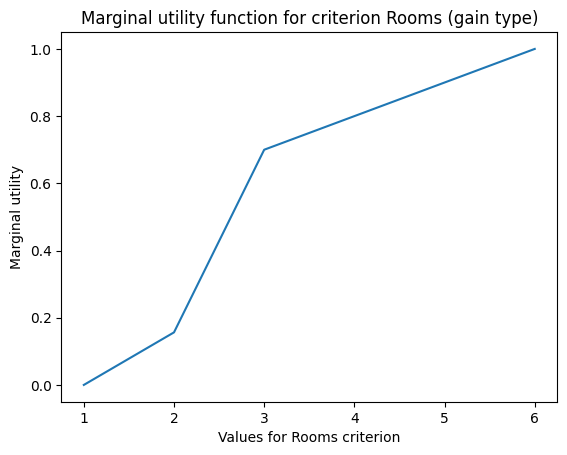

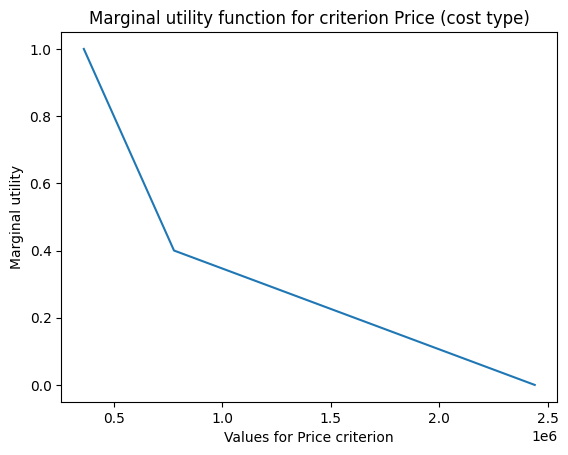

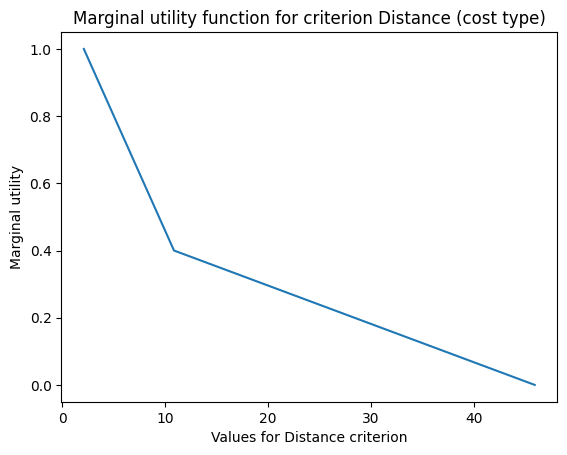

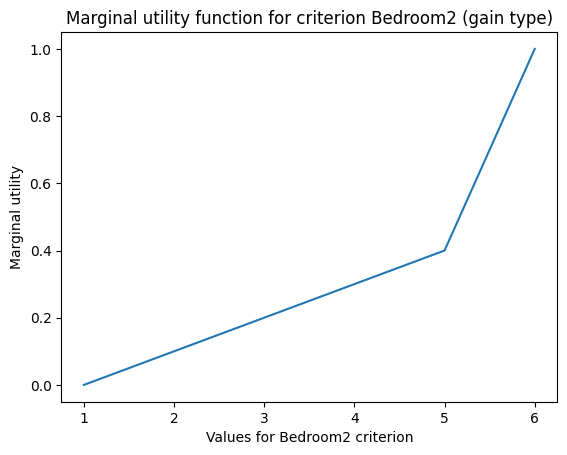

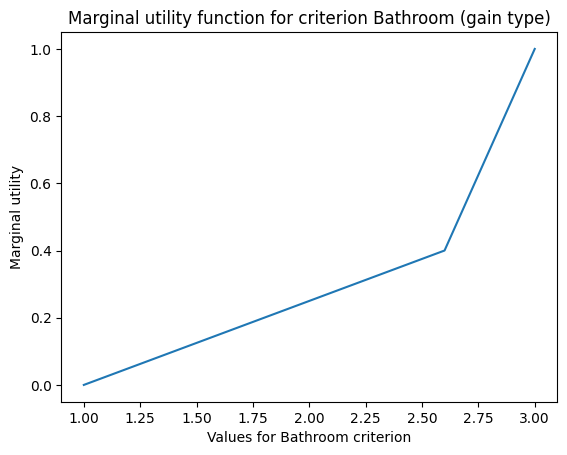

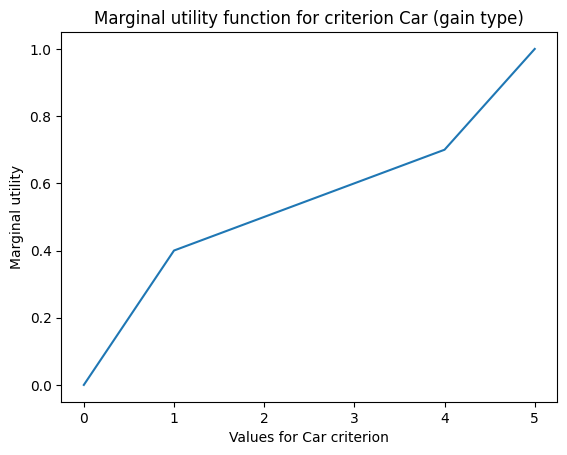

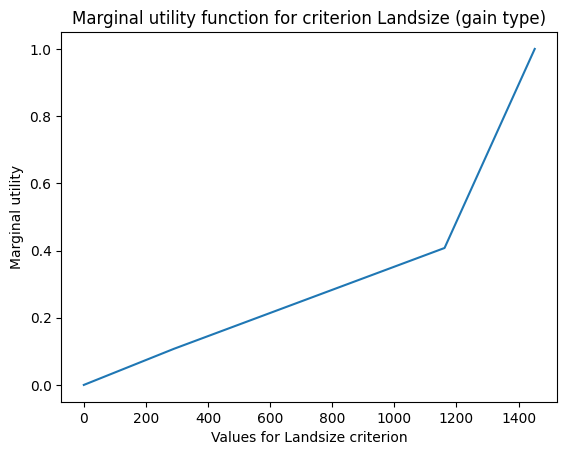

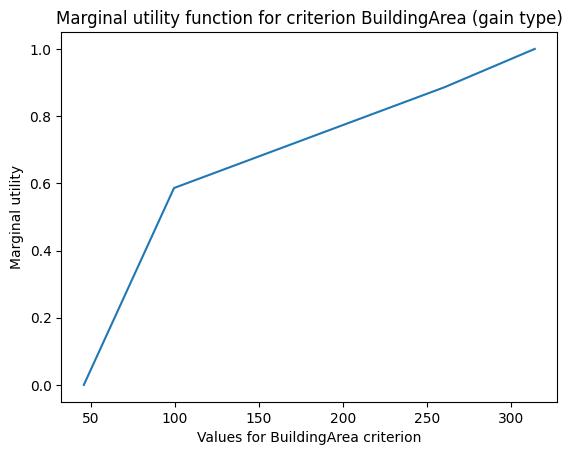

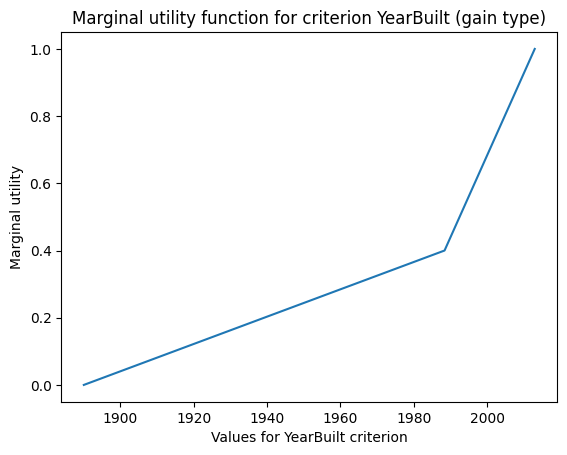

In [278]:
for i in range(len(break_points)):
    crit, bps = break_points[i]
    curr_lambdas = [i[1] for i in lambdas if crit in i[0]]
    plt.plot(bps, curr_lambdas)
    plt.title(f'Marginal utility function for criterion {crit} ({criteria_types[i][0]} type)')
    plt.xlabel(f"Values for {crit} criterion")
    plt.ylabel("Marginal utility")
    plt.show()


### **2.2.5 - Discussion of the results** ###

In [303]:
utilities = []
for var in model2.variables():
    if 'U_' in var.name:
        utilities.append((var.name, var.value()))
utilities.sort(key = lambda x: x[1])
utilities

[('U_a12', 0.0),
 ('U_a13', 0.0),
 ('U_a14', 0.0),
 ('U_a16', 0.0),
 ('U_a17', 0.0),
 ('U_a19', 0.0),
 ('U_a29', 0.0),
 ('U_a33', 0.0),
 ('U_a34', 0.0),
 ('U_a37', 0.0),
 ('U_a38', 0.0),
 ('U_a42', 0.0),
 ('U_a44', 0.0),
 ('U_a46', 0.0),
 ('U_a7', 0.0),
 ('U_a11', 0.001),
 ('U_a23', 0.001),
 ('U_a24', 0.001),
 ('U_a30', 0.001),
 ('U_a41', 0.002),
 ('U_a28', 0.0164502),
 ('U_a48', 0.0342466),
 ('U_a35', 0.0487805),
 ('U_a18', 0.0710027),
 ('U_a32', 0.243902),
 ('U_a9', 0.243902),
 ('U_a5', 0.26136),
 ('U_a26', 0.26236),
 ('U_a6', 0.343902),
 ('U_a2', 0.4),
 ('U_a43', 0.799129),
 ('U_a10', 0.977778),
 ('U_a15', 0.977778),
 ('U_a20', 0.977778),
 ('U_a22', 0.977778),
 ('U_a25', 0.977778),
 ('U_a3', 0.977778),
 ('U_a31', 0.977778),
 ('U_a36', 0.977778),
 ('U_a47', 0.977778),
 ('U_a8', 0.977778),
 ('U_a49', 0.998),
 ('U_a1', 0.999),
 ('U_a21', 0.999),
 ('U_a50', 0.999),
 ('U_a27', 1.0),
 ('U_a39', 1.0),
 ('U_a4', 1.0),
 ('U_a40', 1.0),
 ('U_a45', 1.0)]

1. We can see that the best alternatives are: a4, a27, a39, a40, a45. Those alternatives are houses that have reasonable price, have several rooms and bathrooms, high Landsize, high BuildingArea and are relatively young (between 1997 and 2013). There are also other alternatives that have relatively high values but are less than 1 because other alternatives are preffered over them. In other words those are very attractive houses

2. We can see that there are 15 alternatives classified as the worst. In most cases they are old, expensive houses, far from center of Melbourne, with small building area, small landsize and few rooms

3. There are many alternatives with the same value of utility function - they are classified as equally attractive (this happens because we have 50 alternatives and to overcome this problem we would need to provide more constraints)

### **Computing Kendall's tau coefficient** ###

In [280]:
R_UTA = np.zeros((50, 50))
R_UTA

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [286]:
for i in range(50): # row
    for j in range(50): # column
        a_1, U_1 = utilities[i]
        index_1 = int(a_1[3:]) - 1
        a_2, U_2 = utilities[j]
        index_2 = int(a_2[3:]) - 1
        if i == j:
            continue
        elif U_1 > U_2:
            R_UTA[index_1][index_2] = 1 # ai preferred over aj
        elif U_1 < U_2:
            R_UTA[index_1][index_2] = 0 # aj preferred over ai
        else: 
            R_UTA[index_1][index_2] = 0.5 # ai is indifferent with aj

In [287]:
R_UTA

array([[0. , 1. , 1. , ..., 1. , 1. , 0.5],
       [0. , 0. , 0. , ..., 1. , 0. , 0. ],
       [0. , 1. , 0. , ..., 1. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 1. , 1. , ..., 1. , 0. , 0. ],
       [0.5, 1. , 1. , ..., 1. , 1. , 0. ]])

## **4. Comparing UTA with Promethee II** ##

In [304]:
utilities.sort(key = lambda x: int(x[0][3:]))
utilities

[('U_a1', 0.999),
 ('U_a2', 0.4),
 ('U_a3', 0.977778),
 ('U_a4', 1.0),
 ('U_a5', 0.26136),
 ('U_a6', 0.343902),
 ('U_a7', 0.0),
 ('U_a8', 0.977778),
 ('U_a9', 0.243902),
 ('U_a10', 0.977778),
 ('U_a11', 0.001),
 ('U_a12', 0.0),
 ('U_a13', 0.0),
 ('U_a14', 0.0),
 ('U_a15', 0.977778),
 ('U_a16', 0.0),
 ('U_a17', 0.0),
 ('U_a18', 0.0710027),
 ('U_a19', 0.0),
 ('U_a20', 0.977778),
 ('U_a21', 0.999),
 ('U_a22', 0.977778),
 ('U_a23', 0.001),
 ('U_a24', 0.001),
 ('U_a25', 0.977778),
 ('U_a26', 0.26236),
 ('U_a27', 1.0),
 ('U_a28', 0.0164502),
 ('U_a29', 0.0),
 ('U_a30', 0.001),
 ('U_a31', 0.977778),
 ('U_a32', 0.243902),
 ('U_a33', 0.0),
 ('U_a34', 0.0),
 ('U_a35', 0.0487805),
 ('U_a36', 0.977778),
 ('U_a37', 0.0),
 ('U_a38', 0.0),
 ('U_a39', 1.0),
 ('U_a40', 1.0),
 ('U_a41', 0.002),
 ('U_a42', 0.0),
 ('U_a43', 0.799129),
 ('U_a44', 0.0),
 ('U_a45', 1.0),
 ('U_a46', 0.0),
 ('U_a47', 0.977778),
 ('U_a48', 0.0342466),
 ('U_a49', 0.998),
 ('U_a50', 0.999)]

For simplicity we got rid of ids of alternatives and changed it to a1 - a50. To compare it with PROMETHEE (previous project) we need to reverse it and change it once again to ids.

In [305]:
for i in range(len(utilities)):
    name, value = utilities[i]
    updated_name = 'U_'+ str(ids.values[i][0])
    utilities[i] = (updated_name, value)
utilities.sort(key = lambda x: int(x[0][2:]), reverse=False)
utilities

[('U_171', 0.999),
 ('U_318', 0.4),
 ('U_800', 0.977778),
 ('U_1984', 1.0),
 ('U_2757', 0.26136),
 ('U_2874', 0.343902),
 ('U_3177', 0.0),
 ('U_3249', 0.977778),
 ('U_3404', 0.243902),
 ('U_3833', 0.977778),
 ('U_4000', 0.001),
 ('U_4236', 0.0),
 ('U_4583', 0.0),
 ('U_4744', 0.0),
 ('U_4793', 0.977778),
 ('U_5273', 0.0),
 ('U_6124', 0.0),
 ('U_6551', 0.0710027),
 ('U_6562', 0.0),
 ('U_6594', 0.977778),
 ('U_6758', 0.999),
 ('U_6902', 0.977778),
 ('U_7100', 0.001),
 ('U_7343', 0.001),
 ('U_7388', 0.977778),
 ('U_7588', 0.26236),
 ('U_7764', 1.0),
 ('U_8059', 0.0164502),
 ('U_8163', 0.0),
 ('U_8257', 0.001),
 ('U_8361', 0.977778),
 ('U_8817', 0.243902),
 ('U_8840', 0.0),
 ('U_9047', 0.0),
 ('U_9084', 0.0487805),
 ('U_9165', 0.977778),
 ('U_9236', 0.0),
 ('U_9838', 0.0),
 ('U_10808', 1.0),
 ('U_10957', 1.0),
 ('U_11048', 0.002),
 ('U_11298', 0.0),
 ('U_11314', 0.799129),
 ('U_12791', 0.0),
 ('U_12946', 1.0),
 ('U_12983', 0.0),
 ('U_13118', 0.977778),
 ('U_13176', 0.0342466),
 ('U_13260', 

Best alternatives by UTA are houses with ID: 1 984, 7 764, 10 808, 10 957, 12 946 (equally good)

Top 5 best alternatives by PROMETHEE II are houses with ID: 8 817, 10 957, 9 084, 7 764, 12 946.

We can see that houses with IDs 7764, 10 957, 12 946 are listed as best both by Promethee and by UTA (there is consistency between two methods).

However, best alternative ranked by PROMETHEE II (house with ID 8 817) is ranked as average by UTA and third best alternative ranked by PROMETHEE II (house with ID 9 084) is ranked as poor by UTA.

On the other hand, house with ID 10 808 is ranked as best by UTA and it is also ranked as eighth best alternative by PROMETHEE II and house with ID 1 984 is in the middle of the ranking built by PROMETHEE II.

5 worst alternatives ranked by PROMETHEE II are houses with ID: 4 583, 8 163, 3 177, 12 983, 13 176

UTA ranks 15 houses as worst so there is no need to write them

4 worst houses (ones with IDs: 4 583, 8 163, 3 177, 12 983) ranked by PROMETHEE II are also ranked as worst by UTA (utility function is equal to 0.0). House 13 176 is also ranked as one of the worst alternative with value of utility function equal to 0.034.

To sum up, PROMETHEE II and UTA are consistent - best and worst alternatives overlap in both cases 